In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates


from glob import glob
import datetime
now = datetime.date.today() # data do pliku

In [2]:
pd.set_option('display.width', None)
pd.set_option('display.max_rows', None)
pd.set_option('colheader_justify', 'center')

In [3]:
# import starych df
data_files = sorted(glob('Dane/dane*.csv'))
df_old=pd.concat((pd.read_csv(file) for file in data_files), ignore_index=True)
df_old['date']=pd.to_datetime(df_old['date'])

In [4]:
df_old.dtypes

date          datetime64[ns]
name                  object
url                   object
price                float64
currency              object
Unnamed: 0           float64
dtype: object

In [5]:
df_old

,date,name,url,price,currency,Unnamed: 0
0,2020-12-01 17:49:21.022212,quilt,https://cumulus.equipment/pl_pl/spiwory/quilty...,889.00,PLN,NaN
1,2020-12-01 17:49:21.022212,esker,https://kross.eu/pl/rowery/szosowe/gravel/eske...,4899.00,PLN,NaN
2,2020-12-01 17:49:21.022212,selex400_1,https://www.merida-bikes.com/pl-pl/bike/667/si...,6699.00,PLN,NaN
3,2020-12-01 17:49:21.022212,silex400_2,https://rower.com.pl/merida-silex-400--2079478,6499.00,PLN,NaN
4,2020-12-01 17:49:21.022212,silex400_3,http://www.megastart.pl/rowery/turystyczne/sil...,6999.00,PLN,NaN
5,2020-12-01 17:49:21.022212,worek5L,https://8a.pl/worek-wodoszczelny-exped-fold-dr...,59.49,PLN,NaN
6,2020-12-01 17:49:21.022212,worek4L,https://www.skalnik.pl/worek-ultra-sil-nano-4l...,43.86,PLN,NaN
7,2020-12-01 17:49:21.022212,stuptuty,https://8a.pl/stuptuty-biegowe-inov-8-all-terr...,71.99,PLN,NaN
8,2020-12-01 17:49:21.022212,ponczo,https://www.decathlon.pl/p/ponczo-my-liwskie-g...,59.99,PLN,NaN
9,2020-12-01 17:51:09.620562,quilt,https://cumulus.equipment/pl_pl/spiwory/quilty...,889.00,PLN,NaN


In [6]:
from data import dane

In [7]:
df_new = pd.DataFrame(dane, columns=['date', 'name', 'url', 'price', 'currency'])

In [8]:
df_new

,date,name,url,price,currency
0,2020-12-07 17:36:53.684840,quilt,https://cumulus.equipment/pl_pl/spiwory/quilty...,889.00,PLN
1,2020-12-07 17:36:53.684840,esker,https://kross.eu/pl/rowery/szosowe/gravel/eske...,4899.00,PLN
2,2020-12-07 17:36:53.684840,selex400_1,https://www.merida-bikes.com/pl-pl/bike/667/si...,6699.00,PLN
3,2020-12-07 17:36:53.684840,silex400_2,https://rower.com.pl/merida-silex-400--2079478,6499.00,PLN
4,2020-12-07 17:36:53.684840,silex400_3,http://www.megastart.pl/rowery/turystyczne/sil...,6999.00,PLN
5,2020-12-07 17:36:53.684840,worek5L,https://8a.pl/worek-wodoszczelny-exped-fold-dr...,59.49,PLN
6,2020-12-07 17:36:53.684840,worek4L,https://www.skalnik.pl/worek-ultra-sil-nano-4l...,43.86,PLN
7,2020-12-07 17:36:53.684840,stuptuty,https://8a.pl/stuptuty-biegowe-inov-8-all-terr...,71.99,PLN
8,2020-12-07 17:36:53.684840,ponczo,https://www.decathlon.pl/p/ponczo-my-liwskie-g...,59.99,PLN
9,2020-12-07 17:36:53.684840,worek5L-2,https://8a.pl/lifeventure-ultralight-dry-bag-5-l,47.39,PLN


In [9]:
df_new.to_csv(f'Dane/dane{now}.csv')

# Mardzin framow

In [10]:
df_all=pd.concat([df_old, df_new], ignore_index=True)

In [11]:
df_all

,date,name,url,price,currency,Unnamed: 0
0,2020-12-01 17:49:21.022212,quilt,https://cumulus.equipment/pl_pl/spiwory/quilty...,889.00,PLN,NaN
1,2020-12-01 17:49:21.022212,esker,https://kross.eu/pl/rowery/szosowe/gravel/eske...,4899.00,PLN,NaN
2,2020-12-01 17:49:21.022212,selex400_1,https://www.merida-bikes.com/pl-pl/bike/667/si...,6699.00,PLN,NaN
3,2020-12-01 17:49:21.022212,silex400_2,https://rower.com.pl/merida-silex-400--2079478,6499.00,PLN,NaN
4,2020-12-01 17:49:21.022212,silex400_3,http://www.megastart.pl/rowery/turystyczne/sil...,6999.00,PLN,NaN
5,2020-12-01 17:49:21.022212,worek5L,https://8a.pl/worek-wodoszczelny-exped-fold-dr...,59.49,PLN,NaN
6,2020-12-01 17:49:21.022212,worek4L,https://www.skalnik.pl/worek-ultra-sil-nano-4l...,43.86,PLN,NaN
7,2020-12-01 17:49:21.022212,stuptuty,https://8a.pl/stuptuty-biegowe-inov-8-all-terr...,71.99,PLN,NaN
8,2020-12-01 17:49:21.022212,ponczo,https://www.decathlon.pl/p/ponczo-my-liwskie-g...,59.99,PLN,NaN
9,2020-12-01 17:51:09.620562,quilt,https://cumulus.equipment/pl_pl/spiwory/quilty...,889.00,PLN,NaN


In [12]:
# Produktuy

In [13]:
df_produkty=df_all[['name','url']].drop_duplicates()
df_produkty

,name,url
0,quilt,https://cumulus.equipment/pl_pl/spiwory/quilty...
1,esker,https://kross.eu/pl/rowery/szosowe/gravel/eske...
2,selex400_1,https://www.merida-bikes.com/pl-pl/bike/667/si...
3,silex400_2,https://rower.com.pl/merida-silex-400--2079478
4,silex400_3,http://www.megastart.pl/rowery/turystyczne/sil...
5,worek5L,https://8a.pl/worek-wodoszczelny-exped-fold-dr...
6,worek4L,https://www.skalnik.pl/worek-ultra-sil-nano-4l...
7,stuptuty,https://8a.pl/stuptuty-biegowe-inov-8-all-terr...
8,ponczo,https://www.decathlon.pl/p/ponczo-my-liwskie-g...
108,worek5L-2,https://8a.pl/lifeventure-ultralight-dry-bag-5-l


# Pivoty

In [14]:
piv=df_all.pivot_table(index=(df_all.date.dt.year,df_all.date.dt.month,df_all.date.dt.day),columns='name',values='price',aggfunc=min)

In [15]:
piv

name             esker  ponczo  quilt  selex400_1  silex400_2  silex400_3  \
date date date                                                              
2020 12   1     4899.0   59.99  889.0    6699.0      6499.0      6999.0     
          2     4899.0   59.99  889.0    6699.0      6499.0      6999.0     
          3     4899.0   59.99  889.0    6699.0      6499.0      6999.0     
          5     4899.0   59.99  889.0    6699.0      6499.0      6999.0     
          6     4899.0   59.99  889.0    6699.0      6499.0      6999.0     
          7     4899.0   59.99  889.0    6699.0      6499.0      6999.0     

name            stuptuty  worek4L  worek5L  worek5L-2  
date date date                                         
2020 12   1       51.99    43.86    59.49       NaN    
          2       71.99    43.86    79.49       NaN    
          3       71.99    43.86    59.49       NaN    
          5       71.99    43.86    59.49       NaN    
          6       71.99    43.86    59.49     47.39    
          7       71.99    43.86    59.49     47.39

In [16]:
filtr1=piv.diff().ne(0).any(1)


In [17]:
filtr2=piv.diff().any(1)


In [18]:
df_diff=piv[filtr1]

# Ploty

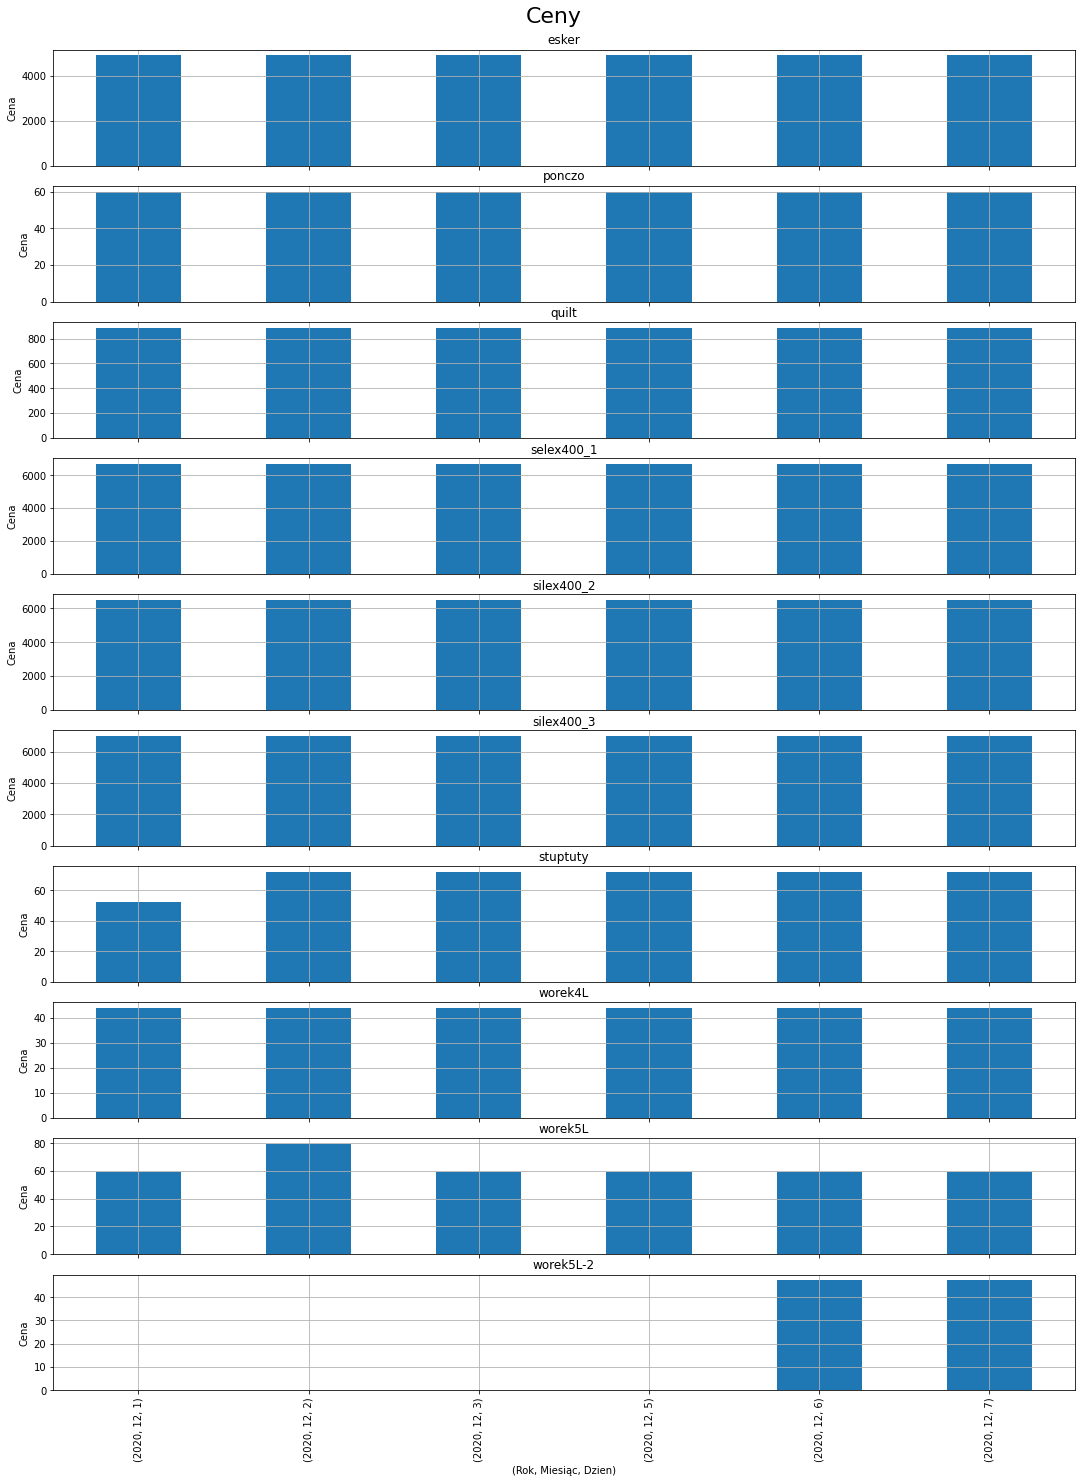

In [19]:
fig, axes = plt.subplots(piv.columns.size,1,figsize=(15,20),sharex=True)
fig.suptitle('Ceny', fontsize=22)
fig.tight_layout()
fig.subplots_adjust(top=0.95)
for n,a in enumerate(axes.flat):
    piv.iloc[:,n].plot(ax=a,kind='bar',grid=True)
    a.set(xlabel=f'(Rok, Miesiąc, Dzien)', ylabel=f'Cena',title=f"{piv.columns[n]}")

plt.savefig('Fig/graph.png',transparent=False)
# plt.show()
